In [2]:
def helper():
    import matplotlib.pyplot as plt
    import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                               ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

We have the training data loaded into trainloader and we make that an iterator with iter(trainloader). Later, we'll use this to loop through the dataset for training. 

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


This is what one of the images looks like.

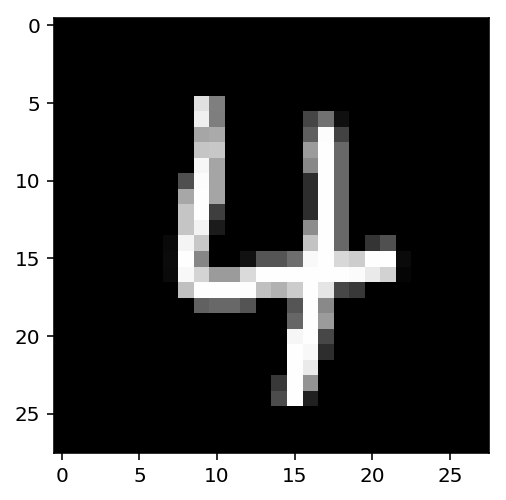

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [7]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print(out)

tensor([[  9.2658, -14.9729,  10.0991, -15.3291,   6.5817,  -2.5705,
          19.9147,  10.8848,  -9.3295,  -5.6223],
        [ 10.1699, -12.2240,  14.1531, -13.8864,   6.3777,   0.3913,
           7.4636,  10.7442,  -3.5720,  -3.6058],
        [  7.2268, -15.7606,  14.0444, -20.1648,   0.6024,   9.5747,
          16.8988,  13.1512, -11.1724,  -0.7776],
        [  2.6807, -16.7962,  15.9094,  -7.8409,  -5.6577,   1.3438,
          18.2745,  10.1042, -25.9574,  -4.1612],
        [ 14.0450, -11.5911,   5.3623, -19.1955,   1.0069,  -3.9910,
          16.3457,  19.4062, -12.4237,  -4.0894],
        [  9.2035, -15.9853,   3.9679, -12.5838,   6.8023,   1.0840,
          16.3113,  13.3918, -19.3914,  -6.1321],
        [  9.6922, -15.4098,   3.8434, -16.5822,   8.3016,  -1.0700,
          28.2105,  12.2421, -11.5458,  -1.1656],
        [  1.8647, -14.2712,  14.9823, -10.9869,  -3.6175,  -3.1681,
           5.8300,   4.7605,  -8.0814,   1.5743],
        [  2.8625,  -4.9286,  -2.1187, -11.0309,

In [8]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)
                                  
probabilities = softmax(out)
                                  
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000])


#### Buildung Networks with PyTorch:

In [9]:
from torch import nn
import torch.nn.functional as F

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(784,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model
        

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

#### Forward Pass: 

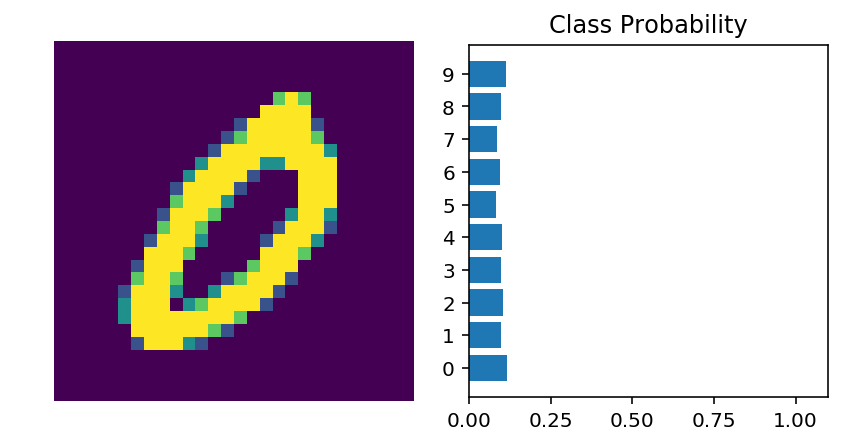

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

img_idx = 0
ps = model.forward(images[img_idx, :1])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

As we can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random.|

In [12]:
# Building a feed forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

print(loss)

tensor(2.3089)


In [13]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor(1.00000e-02 *
       [[-0.0165, -0.0165, -0.0165,  ..., -0.0166, -0.0166, -0.0166],
        [-0.0604, -0.0604, -0.0604,  ..., -0.0604, -0.0604, -0.0604],
        [-0.0556, -0.0556, -0.0556,  ..., -0.0556, -0.0556, -0.0556],
        ...,
        [-0.1011, -0.1011, -0.1011,  ..., -0.1011, -0.1011, -0.1011],
        [-0.2024, -0.2024, -0.2024,  ..., -0.2024, -0.2024, -0.2024],
        [ 0.3909,  0.3909,  0.3909,  ...,  0.3909,  0.3909,  0.3909]])


#### Training the Network:

In [15]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        

Training loss: 1.9057469584031907
Training loss: 0.8370530300303054
Training loss: 0.5384766124586052
Training loss: 0.44330296864006313
Training loss: 0.3954663625372244
Training loss: 0.3662768965209725
Training loss: 0.34552276831096423
Training loss: 0.32976800624304997
Training loss: 0.3173255808254295
Training loss: 0.30682214344742453


With the network trained, we can check out it's predictions.

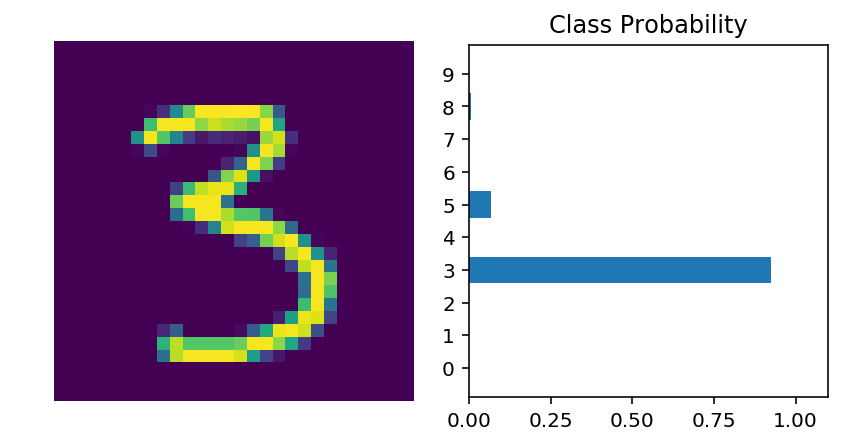

In [18]:
%matplotlib inline
import helper
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

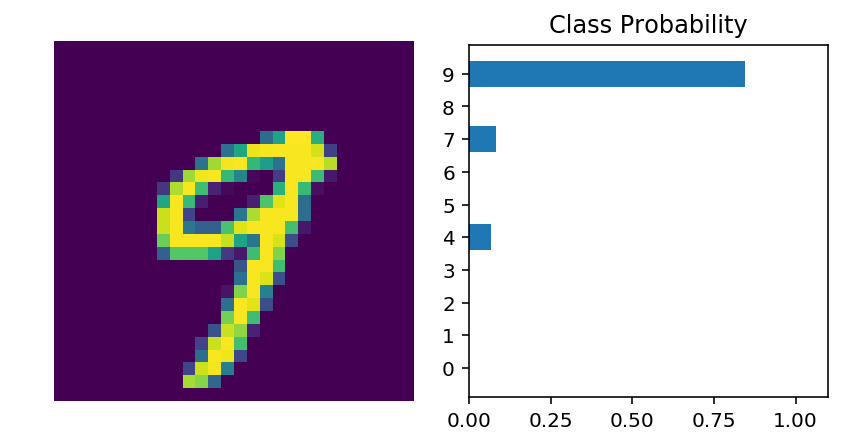

In [31]:
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

Now our network is brilliant. It can accurately predict the digits in our images. Succesfully built a new environment with PyTorch and used it to classifiy handwritten digits from the MNIST dataset 